In [ ]:
from datasets import load_dataset
import pandas as pd
ds = load_dataset("Dingdong-Inc/FreshRetailNet-50K")
train_df = ds['train'].to_pandas()
eval_df = ds['eval'].to_pandas()
display(train_df.head())

Using the latest cached version of the dataset since Dingdong-Inc/FreshRetailNet-50K couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\ASUS\.cache\huggingface\datasets\Dingdong-Inc___fresh_retail_net-50_k\default\0.0.0\2acbe01460f63fb293f090b6cdaf94ac588ab85c (last modified on Tue Oct 28 02:00:42 2025).


,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,stock_hour6_22_cnt,hours_stock_status,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level
0,0,0,0,5,6,65,38,2024-03-28,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,1.6999,15.48,73.54,1.97
1,0,0,0,5,6,65,38,2024-03-29,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,3.0190,15.08,76.56,1.71
2,0,0,0,5,6,65,38,2024-03-30,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,1,0,2.0942,15.91,76.47,1.73
3,0,0,0,5,6,65,38,2024-03-31,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...",11,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...",1.0,1,0,1.5618,16.13,77.40,1.76
4,0,0,0,5,6,65,38,2024-04-01,0.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",8,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",1.0,0,0,3.5386,15.37,78.26,1.25


In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['city_id', 'store_id', 'management_group_id', 'first_category_id', 'second_category_id', 'third_category_id', 'product_id', 'dt', 'sale_amount', 'hours_sale', 'stock_hour6_22_cnt', 'hours_stock_status', 'discount', 'holiday_flag', 'activity_flag', 'precpt', 'avg_temperature', 'avg_humidity', 'avg_wind_level'],
        num_rows: 4500000
    })
    eval: Dataset({
        features: ['city_id', 'store_id', 'management_group_id', 'first_category_id', 'second_category_id', 'third_category_id', 'product_id', 'dt', 'sale_amount', 'hours_sale', 'stock_hour6_22_cnt', 'hours_stock_status', 'discount', 'holiday_flag', 'activity_flag', 'precpt', 'avg_temperature', 'avg_humidity', 'avg_wind_level'],
        num_rows: 350000
    })
})

In [ ]:
train_df.isnull().sum()

,0
city_id,0
store_id,0
management_group_id,0
first_category_id,0
second_category_id,0
third_category_id,0
product_id,0
dt,0
sale_amount,0
hours_sale,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500000 entries, 0 to 4499999
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   city_id              int64  
 1   store_id             int64  
 2   management_group_id  int64  
 3   first_category_id    int64  
 4   second_category_id   int64  
 5   third_category_id    int64  
 6   product_id           int64  
 7   dt                   object 
 8   sale_amount          float64
 9   hours_sale           object 
 10  stock_hour6_22_cnt   int32  
 11  hours_stock_status   object 
 12  discount             float64
 13  holiday_flag         int32  
 14  activity_flag        int32  
 15  precpt               float64
 16  avg_temperature      float64
 17  avg_humidity         float64
 18  avg_wind_level       float64
dtypes: float64(6), int32(3), int64(7), object(3)
memory usage: 600.8+ MB


In [ ]:
train_df.describe()

In [ ]:
def clean_data(train_df, eval_df):
  train_df = train_df.drop_duplicates()
  train_df = train_df.dropna()
  lable_df = lable_df.drop_duplicates()
  lable_df = lable_df.dropna()
  train_df['dt'] = pd.to_datetime(train_df['dt'])
  eval_df['dt'] = pd.to_datetime(eval_df['dt'])
  for col in train_df.columns:
    train_df[col] = train_df[col].apply(lambda x: x.lower() if isinstance(x, str) else x)  # convert to lowercase
  for col in eval_df.columns:
    eval_df[col] = eval_df[col].apply(lambda x: x.lower() if isinstance(x, str) else x)  # convert to lowercase
  return train_df, lable_df

In [ ]:
eval_df.head()

,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,stock_hour6_22_cnt,hours_stock_status,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level
0,0,0,0,5,6,65,38,2024-06-26,0.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,8.8076,27.42,81.70,1.55
1,0,0,0,5,6,65,38,2024-06-27,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,6.7032,28.91,80.34,1.57
2,0,0,0,5,6,65,38,2024-06-28,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,5.9756,28.03,80.37,1.50
3,0,0,0,5,6,65,38,2024-06-29,3.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.4, 0.2, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.5,1,1,3.0101,29.68,80.35,1.86
4,0,0,0,5,6,65,38,2024-06-30,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,1,0,6.4410,28.28,78.61,1.40


# Task
Analyze sales trends by weather conditions using the provided dataset.

## Data preparation

In [ ]:
train_df['dt'] = pd.to_datetime(train_df['dt'])
eval_df['dt'] = pd.to_datetime(eval_df['dt'])

## Featuring

**Reasoning**:
Create new categorical weather features in both dataframes based on the given thresholds for temperature, precipitation, humidity, and wind level.



In [ ]:
def temperature_category(temp):
    if temp < 10:
        return 'cold'
    elif 10 <= temp < 20:
        return 'mild'
    elif 20 <= temp < 30:
        return 'warm'
    else:
        return 'hot'

train_df['temperature_category'] = train_df['avg_temperature'].apply(temperature_category)
eval_df['temperature_category'] = eval_df['avg_temperature'].apply(temperature_category)

def precipitation_category(precpt):
    if precpt == 0:
        return 'no rain'
    elif 0 < precpt < 5:
        return 'light rain'
    else:
        return 'heavy rain'

train_df['precipitation_category'] = train_df['precpt'].apply(precipitation_category)
eval_df['precipitation_category'] = eval_df['precpt'].apply(precipitation_category)

def humidity_category(humidity):
    if humidity < 40:
        return 'low humidity'
    elif 40 <= humidity < 70:
        return 'medium humidity'
    else:
        return 'high humidity'

train_df['humidity_category'] = train_df['avg_humidity'].apply(humidity_category)
eval_df['humidity_category'] = eval_df['avg_humidity'].apply(humidity_category)

def wind_category(wind):
    if wind < 2:
        return 'low wind'
    elif 2 <= wind < 4:
        return 'medium wind'
    else:
        return 'high wind'

train_df['wind_category'] = train_df['avg_wind_level'].apply(wind_category)
eval_df['wind_category'] = eval_df['avg_wind_level'].apply(wind_category)

display(train_df.head())
display(eval_df.head())

,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,...,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level,temperature_category,precipitation_category,humidity_category,wind_category
0,0,0,0,5,6,65,38,2024-03-28,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...",...,0,0,1.6999,15.48,73.54,1.97,mild,light rain,high humidity,low wind
1,0,0,0,5,6,65,38,2024-03-29,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",...,0,0,3.0190,15.08,76.56,1.71,mild,light rain,high humidity,low wind
2,0,0,0,5,6,65,38,2024-03-30,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,1,0,2.0942,15.91,76.47,1.73,mild,light rain,high humidity,low wind
3,0,0,0,5,6,65,38,2024-03-31,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...",...,1,0,1.5618,16.13,77.40,1.76,mild,light rain,high humidity,low wind
4,0,0,0,5,6,65,38,2024-04-01,0.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",...,0,0,3.5386,15.37,78.26,1.25,mild,light rain,high humidity,low wind


,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,...,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level,temperature_category,precipitation_category,humidity_category,wind_category
0,0,0,0,5,6,65,38,2024-06-26,0.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0,0,8.8076,27.42,81.70,1.55,warm,heavy rain,high humidity,low wind
1,0,0,0,5,6,65,38,2024-06-27,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0,0,6.7032,28.91,80.34,1.57,warm,heavy rain,high humidity,low wind
2,0,0,0,5,6,65,38,2024-06-28,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0,0,5.9756,28.03,80.37,1.50,warm,heavy rain,high humidity,low wind
3,0,0,0,5,6,65,38,2024-06-29,3.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.4, 0.2, ...",...,1,1,3.0101,29.68,80.35,1.86,warm,light rain,high humidity,low wind
4,0,0,0,5,6,65,38,2024-06-30,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,1,0,6.4410,28.28,78.61,1.40,warm,heavy rain,high humidity,low wind


## Group and analyze

In [ ]:

avg_sales_by_temperature = train_df.groupby('temperature_category')['sale_amount'].mean()
avg_sales_by_precipitation = train_df.groupby('precipitation_category')['sale_amount'].mean()
avg_sales_by_humidity = train_df.groupby('humidity_category')['sale_amount'].mean()
avg_sales_by_wind = train_df.groupby('wind_category')['sale_amount'].mean()

avg_sales_by_temp_precpt = train_df.groupby(['temperature_category', 'precipitation_category'])['sale_amount'].mean()
avg_sales_by_temp_humidity = train_df.groupby(['temperature_category', 'humidity_category'])['sale_amount'].mean()
avg_sales_by_temp_wind = train_df.groupby(['temperature_category', 'wind_category'])['sale_amount'].mean()
avg_sales_by_precpt_humidity = train_df.groupby(['precipitation_category', 'humidity_category'])['sale_amount'].mean()
avg_sales_by_precpt_wind = train_df.groupby(['precipitation_category', 'wind_category'])['sale_amount'].mean()
avg_sales_by_humidity_wind = train_df.groupby(['humidity_category', 'wind_category'])['sale_amount'].mean()
avg_sales_by_all_weather = train_df.groupby(['temperature_category', 'precipitation_category', 'humidity_category', 'wind_category'])['sale_amount'].mean()

print("Average sales by temperature category:")
display(avg_sales_by_temperature)
print("\nAverage sales by precipitation category:")
display(avg_sales_by_precipitation)
print("\nAverage sales by humidity category:")
display(avg_sales_by_humidity)
print("\nAverage sales by wind category:")
display(avg_sales_by_wind)

print("\nAverage sales by temperature and precipitation categories:")
display(avg_sales_by_temp_precpt)
print("\nAverage sales by temperature and humidity categories:")
display(avg_sales_by_temp_humidity)
print("\nAverage sales by temperature and wind categories:")
display(avg_sales_by_temp_wind)
print("\nAverage sales by precipitation and humidity categories:")
display(avg_sales_by_precpt_humidity)
print("\nAverage sales by precipitation and wind categories:")
display(avg_sales_by_precpt_wind)
print("\nAverage sales by humidity and wind categories:")
display(avg_sales_by_humidity_wind)
print("\nAverage sales by all weather categories:")
display(avg_sales_by_all_weather)

Average sales by temperature category:


,sale_amount
temperature_category,
hot,0.938028
mild,0.888756
warm,1.044120



Average sales by precipitation category:


,sale_amount
precipitation_category,
heavy rain,1.103855
light rain,0.967627
no rain,0.749045



Average sales by humidity category:


,sale_amount
humidity_category,
high humidity,1.007444
low humidity,0.674792
medium humidity,1.006642



Average sales by wind category:


,sale_amount
wind_category,
low wind,1.008057
medium wind,0.966295



Average sales by temperature and precipitation categories:


temperature_category  precipitation_category
hot                   heavy rain                0.968906
                      light rain                0.892904
mild                  heavy rain                0.837769
                      light rain                0.890804
                      no rain                   0.692522
warm                  heavy rain                1.115586
                      light rain                1.012426
                      no rain                   0.770393
Name: sale_amount, dtype: float64


Average sales by temperature and humidity categories:


temperature_category  humidity_category
hot                   high humidity        0.942537
                      medium humidity      0.530000
mild                  high humidity        0.903827
                      low humidity         0.665721
                      medium humidity      0.616027
warm                  high humidity        1.062662
                      low humidity         0.682119
                      medium humidity      1.019252
Name: sale_amount, dtype: float64


Average sales by temperature and wind categories:


temperature_category  wind_category
hot                   low wind         0.941197
                      medium wind      0.878988
mild                  low wind         0.903856
                      medium wind      0.835369
warm                  low wind         1.051792
                      medium wind      1.018359
Name: sale_amount, dtype: float64


Average sales by precipitation and humidity categories:


precipitation_category  humidity_category
heavy rain              high humidity        1.104544
                        medium humidity      0.771036
light rain              high humidity        0.967847
                        low humidity         0.675124
                        medium humidity      1.008062
no rain                 high humidity        0.557143
                        low humidity         0.666301
                        medium humidity      0.842993
Name: sale_amount, dtype: float64


Average sales by precipitation and wind categories:


precipitation_category  wind_category
heavy rain              low wind         1.121656
                        medium wind      1.021858
light rain              low wind         0.971907
                        medium wind      0.954150
no rain                 low wind         0.695237
                        medium wind      0.897240
Name: sale_amount, dtype: float64


Average sales by humidity and wind categories:


humidity_category  wind_category
high humidity      low wind         1.025900
                   medium wind      0.951705
low humidity       low wind         0.672670
                   medium wind      0.705991
medium humidity    low wind         0.992268
                   medium wind      1.086063
Name: sale_amount, dtype: float64


Average sales by all weather categories:


temperature_category  precipitation_category  humidity_category  wind_category
hot                   heavy rain              high humidity      low wind         0.971306
                                                                 medium wind      0.748387
                      light rain              high humidity      low wind         0.903598
                                                                 medium wind      0.897731
                                              medium humidity    low wind         0.530000
mild                  heavy rain              high humidity      low wind         0.858047
                                                                 medium wind      0.829812
                                              medium humidity    medium wind      0.000000
                      light rain              high humidity      low wind         0.925346
                                                                 medium wind      0.836562
                                              low humidity       low wind         0.662388
                                                                 medium wind      0.760056
                                              medium humidity    low wind         0.614755
                                                                 medium wind      0.680680
                      no rain                 high humidity      low wind         0.650000
                                                                 medium wind      0.333333
                                              low humidity       low wind         0.699175
                                                                 medium wind      0.706400
                                              medium humidity    low wind         0.654390
                                                                 medium wind      1.050000
warm                  heavy rain              high humidity      low wind         1.126822
                                                                 medium wind      1.059646
                                              medium humidity    low wind         0.768865
                                                                 medium wind      0.877200
                      light rain              high humidity      low wind         1.039723
                                                                 medium wind      0.989427
                                              low humidity       low wind         0.681449
                                                                 medium wind      0.709000
                                              medium humidity    low wind         1.008373
                                                                 medium wind      1.086231
                      no rain                 high humidity      medium wind      0.800000
                                              low humidity       low wind         0.646606
                                                                 medium wind      0.632215
                                              medium humidity    low wind         0.728460
                                                                 medium wind      1.172385
Name: sale_amount, dtype: float64

In [ ]:
avg_sales_by_all_weather.unstack(level='temperature_category')

temperature_category                                         hot      mild  \
precipitation_category humidity_category wind_category                       
heavy rain             high humidity     low wind       0.971306  0.858047   
                                         medium wind    0.748387  0.829812   
                       medium humidity   low wind            NaN       NaN   
                                         medium wind         NaN  0.000000   
light rain             high humidity     low wind       0.903598  0.925346   
                                         medium wind    0.897731  0.836562   
                       low humidity      low wind            NaN  0.662388   
                                         medium wind         NaN  0.760056   
                       medium humidity   low wind       0.530000  0.614755   
                                         medium wind         NaN  0.680680   
no rain                high humidity     low wind            NaN  0.650000   
                                         medium wind         NaN  0.333333   
                       low humidity      low wind            NaN  0.699175   
                                         medium wind         NaN  0.706400   
                       medium humidity   low wind            NaN  0.654390   
                                         medium wind         NaN  1.050000   

temperature_category                                        warm  
precipitation_category humidity_category wind_category            
heavy rain             high humidity     low wind       1.126822  
                                         medium wind    1.059646  
                       medium humidity   low wind       0.768865  
                                         medium wind    0.877200  
light rain             high humidity     low wind       1.039723  
                                         medium wind    0.989427  
                       low humidity      low wind       0.681449  
                                         medium wind    0.709000  
                       medium humidity   low wind       1.008373  
                                         medium wind    1.086231  
no rain                high humidity     low wind            NaN  
                                         medium wind    0.800000  
                       low humidity      low wind       0.646606  
                                         medium wind    0.632215  
                       medium humidity   low wind       0.728460  
                                         medium wind    1.172385

In [ ]:
avg_sales_by_all_weather.unstack()

wind_category                                                  low wind  \
temperature_category precipitation_category humidity_category             
hot                  heavy rain             high humidity      0.971306   
                     light rain             high humidity      0.903598   
                                            medium humidity    0.530000   
mild                 heavy rain             high humidity      0.858047   
                                            medium humidity         NaN   
                     light rain             high humidity      0.925346   
                                            low humidity       0.662388   
                                            medium humidity    0.614755   
                     no rain                high humidity      0.650000   
                                            low humidity       0.699175   
                                            medium humidity    0.654390   
warm                 heavy rain             high humidity      1.126822   
                                            medium humidity    0.768865   
                     light rain             high humidity      1.039723   
                                            low humidity       0.681449   
                                            medium humidity    1.008373   
                     no rain                high humidity           NaN   
                                            low humidity       0.646606   
                                            medium humidity    0.728460   

wind_category                                                  medium wind  
temperature_category precipitation_category humidity_category               
hot                  heavy rain             high humidity         0.748387  
                     light rain             high humidity         0.897731  
                                            medium humidity            NaN  
mild                 heavy rain             high humidity         0.829812  
                                            medium humidity       0.000000  
                     light rain             high humidity         0.836562  
                                            low humidity          0.760056  
                                            medium humidity       0.680680  
                     no rain                high humidity         0.333333  
                                            low humidity          0.706400  
                                            medium humidity       1.050000  
warm                 heavy rain             high humidity         1.059646  
                                            medium humidity       0.877200  
                     light rain             high humidity         0.989427  
                                            low humidity          0.709000  
                                            medium humidity       1.086231  
                     no rain                high humidity         0.800000  
                                            low humidity          0.632215  
                                            medium humidity       1.172385

## Visualize the trends



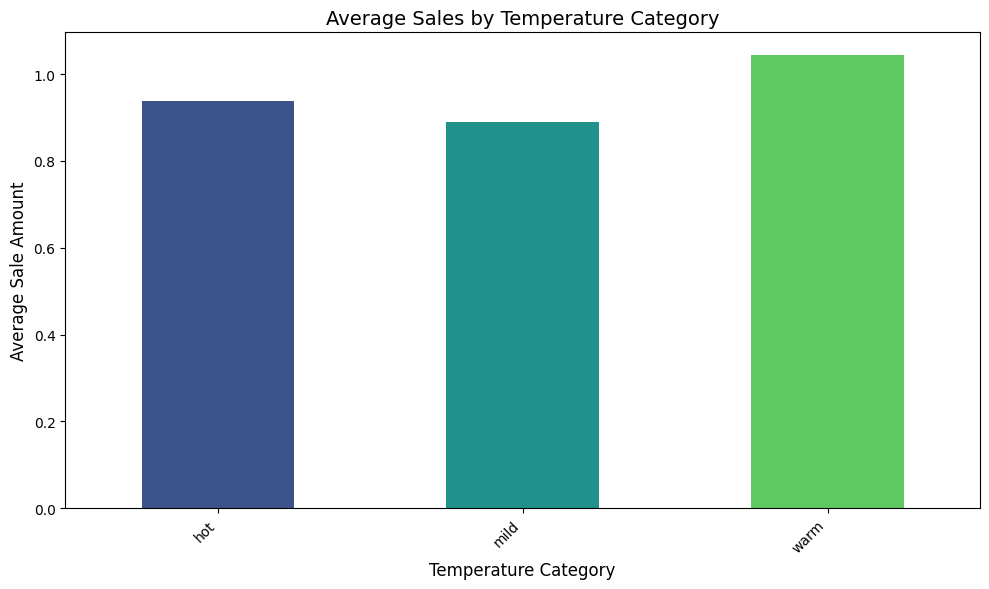

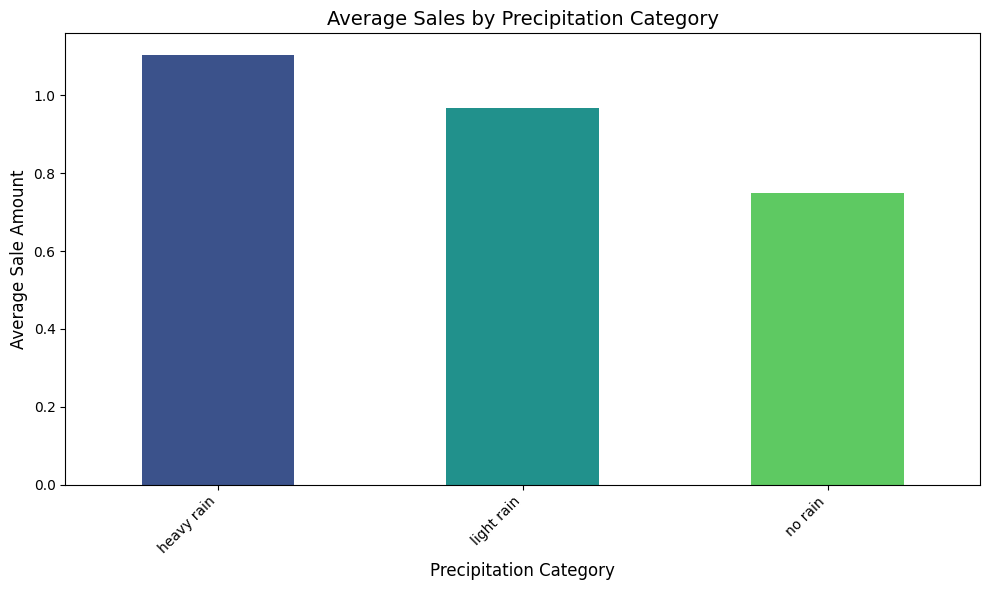

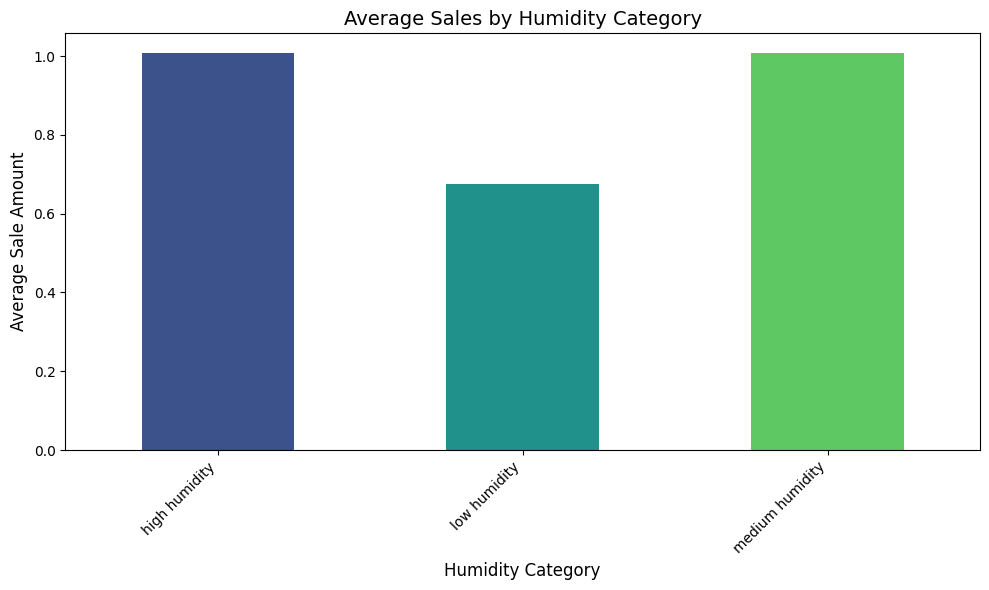

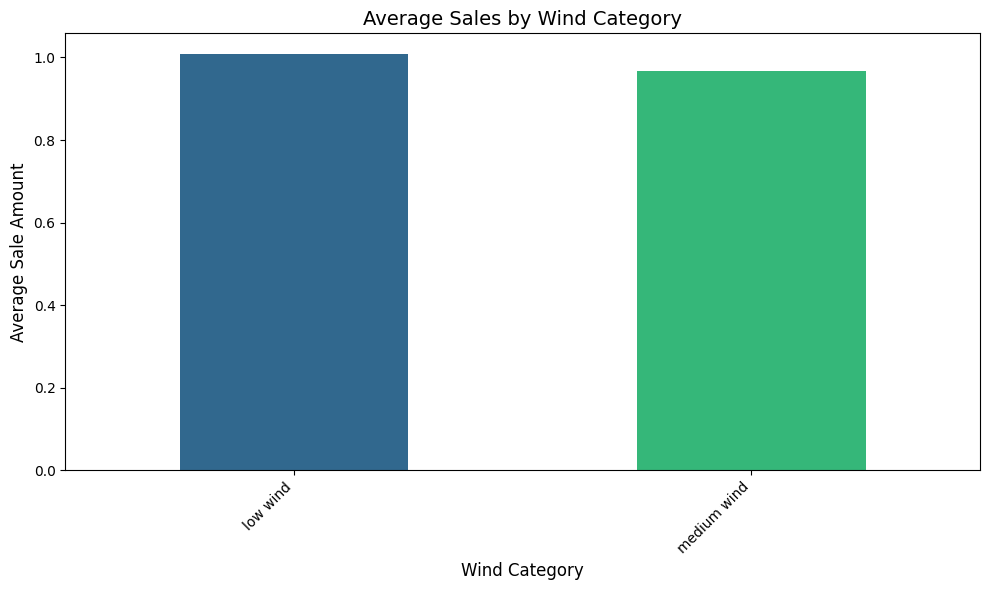

<Figure size 1000x600 with 0 Axes>

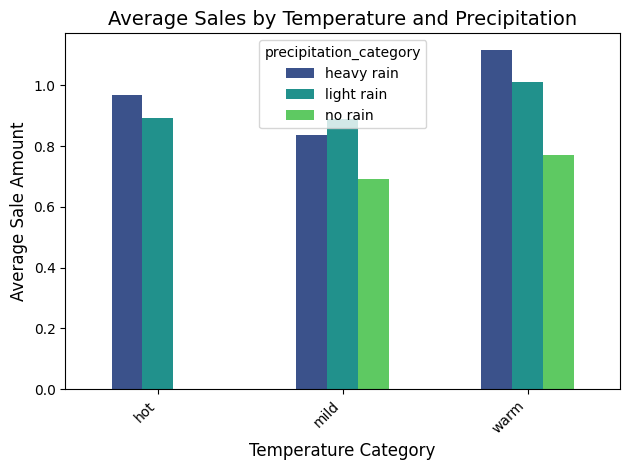

<Figure size 1000x600 with 0 Axes>

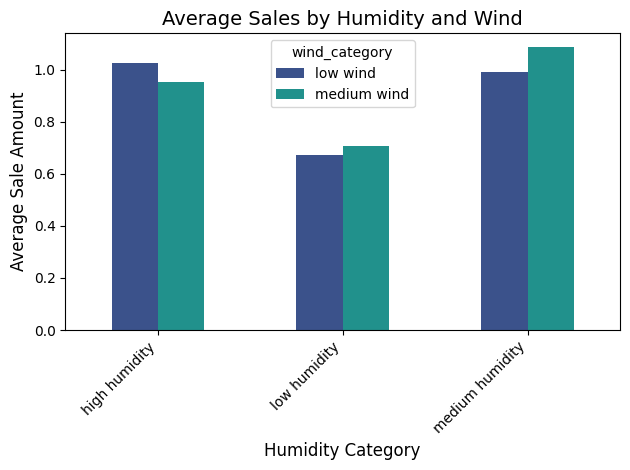

<Figure size 1000x600 with 0 Axes>

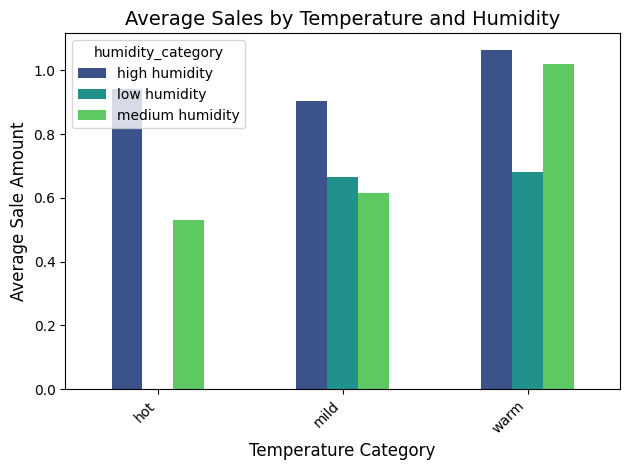

<Figure size 1000x600 with 0 Axes>

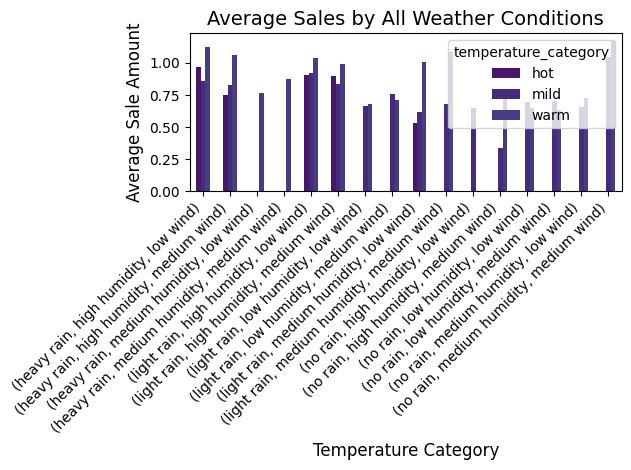

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_bar_plot(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', color=sns.color_palette("viridis", len(data)))
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

create_bar_plot(avg_sales_by_temperature, 'Average Sales by Temperature Category', 'Temperature Category', 'Average Sale Amount')
create_bar_plot(avg_sales_by_precipitation, 'Average Sales by Precipitation Category', 'Precipitation Category', 'Average Sale Amount')
create_bar_plot(avg_sales_by_humidity, 'Average Sales by Humidity Category', 'Humidity Category', 'Average Sale Amount')
create_bar_plot(avg_sales_by_wind, 'Average Sales by Wind Category', 'Wind Category', 'Average Sale Amount')

# Plotting combinations of weather conditions
create_bar_plot(avg_sales_by_temp_precpt.unstack(), 'Average Sales by Temperature and Precipitation', 'Temperature Category', 'Average Sale Amount')
create_bar_plot(avg_sales_by_humidity_wind.unstack(), 'Average Sales by Humidity and Wind', 'Humidity Category', 'Average Sale Amount')
create_bar_plot(avg_sales_by_temp_humidity.unstack(), 'Average Sales by Temperature and Humidity', 'Temperature Category', 'Average Sale Amount')
create_bar_plot(avg_sales_by_all_weather.unstack(level='temperature_category'), 'Average Sales by All Weather Conditions', 'Temperature Category', 'Average Sale Amount')

##Split data, train and evaluate

In [ ]:
from re import X
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
def split_categorical_data():
  categorical_columns = ['temperature_category', 'precipitation_category', 'humidity_category', 'wind_category']
  label_columns = ['sale_amount']
  X_train, X_test, y_train, y_test = train_test_split(train_df[categorical_columns], train_df[label_columns], test_size=0.2, random_state=42)
  le = LabelEncoder()
  for col in X_train.columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
  return X_train, X_test, y_train, y_test

In [ ]:
from re import X
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
def split_numerical_data(train_df):
  numerical_columns = ['precpt', 'avg_temperature', 'avg_humidity', 'avg_wind_level']
  label_columns = ['sale_amount']
  X_train, X_test, y_train, y_test = train_test_split(train_df[numerical_columns], train_df[label_columns], test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

###Categorical Data


In [ ]:
#split_numerical_data()
X_train, X_test, y_train, y_test = split_categorical_data()
X_train.head()

,temperature_category,precipitation_category,humidity_category,wind_category
1005552,2,1,0,0
2422375,1,1,1,0
1308462,2,1,2,0
2163361,2,1,0,0
3069961,2,0,0,0


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=42)

In [ ]:
predictions = model.predict(X_test)
display(predictions[:10])

array([0.8363904 , 1.00838542, 0.92546869, 1.12611439, 1.0398252 ,
       1.00838542, 0.92546869, 0.8363904 , 1.12611439, 1.00838542])

In [ ]:
sale_by_week = train_df.set_index('dt').resample('W').size()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

#Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 1.9742928725866722
Root Mean Squared Error (RMSE): 1.4050953250888967


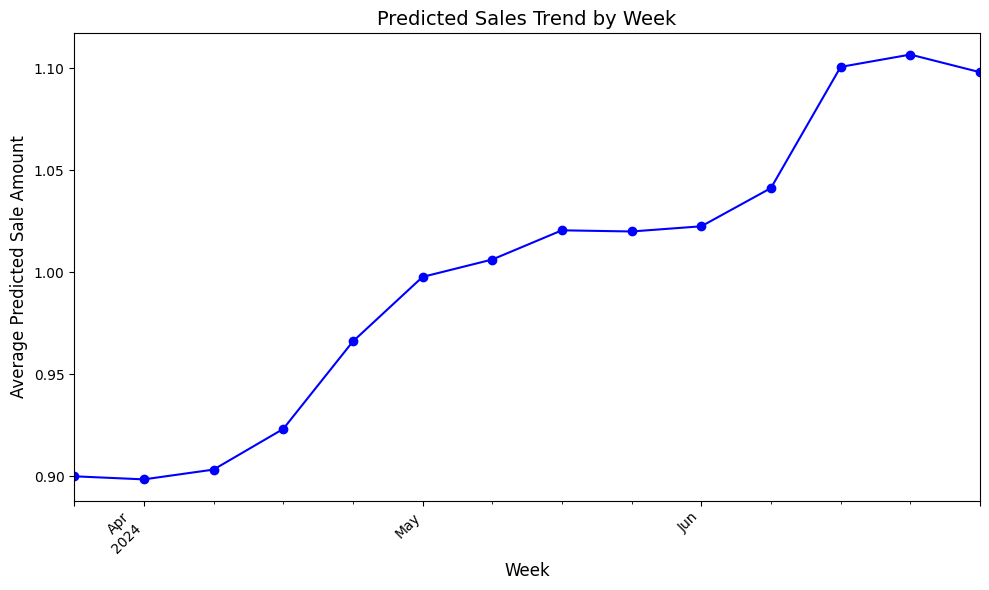

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def line_plot(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    ax = data.plot(kind='line', color='blue', marker='o')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

predicted_sales_df = pd.DataFrame({'dt': train_df.loc[X_test.index, 'dt'], 'predicted_sale_amount': predictions})
predicted_sales_df = predicted_sales_df.set_index('dt').sort_index()
predicted_sales_by_week = predicted_sales_df['predicted_sale_amount'].resample('W').mean()
predicted_sales_df
line_plot(predicted_sales_by_week, 'Predicted Sales Trend by Week', 'Week', 'Average Predicted Sale Amount')

###Numerical data


In [ ]:
X_train, X_test, y_train, y_test = split_numerical_data(train_df)
display(X_train.head())

,precpt,avg_temperature,avg_humidity,avg_wind_level
1005552,2.3716,25.13,74.04,1.64
2422375,0.2652,18.66,38.40,1.42
1308462,0.2930,20.77,67.79,1.67
2163361,3.1520,21.26,76.42,1.68
3069961,7.5260,25.47,79.99,1.32


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.values.ravel())

KeyboardInterrupt: 

In [ ]:
predictions = model.predict(X_test)
display(predictions[:10])

In [ ]:
predicted_sales_df = pd.DataFrame({'dt': train_df.loc[X_test.index, 'dt'], 'predicted_sale_amount': predictions})
display(predicted_sales_df.head())

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE) using eval_df
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE) on eval_df: {mse}")

# Calculate Root Mean Squared Error (RMSE) using eval_df
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) on eval_df: {rmse}")

In [ ]:
print(train_df['sale_amount'].min())
print(train_df['sale_amount'].max())

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def line_plot(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    ax = data.plot(kind='line', color='blue', marker='o')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

predicted_sales_df = pd.DataFrame({'dt': train_df.loc[X_test.index, 'dt'], 'predicted_sale_amount': predictions})
predicted_sales_df = predicted_sales_df.set_index('dt').sort_index()
predicted_sales_by_week = predicted_sales_df['predicted_sale_amount'].resample('W').mean()

line_plot(predicted_sales_by_week, 'Predicted Sales Trend by Week', 'Week', 'Average Predicted Sale Amount')

In [ ]:
eval_df.head()

In [ ]:
from datasets import load_dataset
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("Dingdong-Inc/FreshRetailNet-50K")

# Convert datasets to pandas DataFrames
train_df = ds['train'].to_pandas()
eval_df = ds['eval'].to_pandas()

In [ ]:
train_df['dt'] = pd.to_datetime(train_df['dt'])
eval_df['dt'] = pd.to_datetime(eval_df['dt'])

# Task

## Stocks


In [ ]:
display(train_df['stock_hour6_22_cnt'].value_counts(normalize=True).head())

potential_stockout_low_stock_low_sales = train_df[(train_df['stock_hour6_22_cnt'] == 0) & (train_df['sale_amount'] == 0)]
print("\nPotential stockout periods (stock_hour6_22_cnt == 0 and sale_amount == 0):")
display(potential_stockout_low_stock_low_sales.head())
import ast

def is_stockout_during_hours(hours_stock_status_str):
    try:
        hours_status = ast.literal_eval(hours_stock_status_str)

        if len(hours_status) >= 23:
             return all(status == 0 for status in hours_status[6:23])
        else:
             return False

    except (ValueError, SyntaxError):
        return False

train_df['potential_stockout_detailed'] = train_df['hours_stock_status'].apply(is_stockout_during_hours)

potential_stockout_detailed_periods = train_df[train_df['potential_stockout_detailed']]
print("\nPotential stockout periods based on hours_stock_status (all zeros from hour 6 to 22):")
display(potential_stockout_detailed_periods.head())

train_df['is_stockout'] = train_df['potential_stockout_detailed']

print("\nTraining DataFrame with 'is_stockout' column:")
display(train_df.head())

Distribution of stock_hour6_22_cnt in train_df:


,proportion
stock_hour6_22_cnt,
0,0.557332
5,0.053844
6,0.045195
4,0.044362
16,0.040398



Potential stockout periods (stock_hour6_22_cnt == 0 and sale_amount == 0):


,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,...,avg_temperature,avg_humidity,avg_wind_level,year,month,dayofweek,weekofyear,sale_amount_lag_1,sale_amount_lag_7,sale_amount_lag_30
2,0,0,0,5,6,65,38,2024-03-30,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,15.91,76.47,1.73,2024,3,5,13,0.1,0.0,0.0
8,0,0,0,5,6,65,38,2024-04-05,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,16.24,71.99,1.46,2024,4,4,14,0.2,0.1,0.0
10,0,0,0,5,6,65,38,2024-04-07,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,16.55,79.62,1.23,2024,4,6,14,0.2,0.1,0.0
37,0,0,0,5,6,65,38,2024-05-04,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,21.06,70.34,1.59,2024,5,5,18,0.1,0.1,0.2
38,0,0,0,5,6,65,38,2024-05-05,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,20.31,73.87,1.54,2024,5,6,18,0.0,0.1,0.0



Potential stockout periods based on hours_stock_status (all zeros from hour 6 to 22):


,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,...,avg_humidity,avg_wind_level,year,month,dayofweek,weekofyear,sale_amount_lag_1,sale_amount_lag_7,sale_amount_lag_30,potential_stockout_detailed



Training DataFrame with 'is_stockout' column:


,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,...,avg_wind_level,year,month,dayofweek,weekofyear,sale_amount_lag_1,sale_amount_lag_7,sale_amount_lag_30,potential_stockout_detailed,is_stockout
0,0,0,0,5,6,65,38,2024-03-28,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...",...,1.97,2024,3,3,13,0.0,0.0,0.0,False,False
1,0,0,0,5,6,65,38,2024-03-29,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",...,1.71,2024,3,4,13,0.1,0.0,0.0,False,False
2,0,0,0,5,6,65,38,2024-03-30,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,1.73,2024,3,5,13,0.1,0.0,0.0,False,False
3,0,0,0,5,6,65,38,2024-03-31,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...",...,1.76,2024,3,6,13,0.0,0.0,0.0,False,False
4,0,0,0,5,6,65,38,2024-04-01,0.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",...,1.25,2024,4,0,14,0.1,0.0,0.0,False,False


In [ ]:
# Display the first 10 rows of the original 'hours_stock_status' and the new 'hours_stock_status_list'
print("First 10 rows of original 'hours_stock_status' and 'hours_stock_status_list':")
display(train_df[['hours_stock_status', 'hours_stock_status_list']].head(10))

print("\nLength of the first 20 lists in 'hours_stock_status_list':")
display(train_df['hours_stock_status_list'].apply(len).head(20))

print("\nChecking for non-string values in 'hours_stock_status' column:")
non_string_hours_stock_status = train_df[train_df['hours_stock_status'].apply(lambda x: not isinstance(x, str))]
print(f"Number of non-string values: {len(non_string_hours_stock_status)}")
if len(non_string_hours_stock_status) > 0:
    print("Examples of non-string values:")
    display(non_string_hours_stock_status.head())

First 10 rows of original 'hours_stock_status' and 'hours_stock_status_list':


,hours_stock_status,hours_stock_status_list
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]
2,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...",[]
4,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",[]
5,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]
6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]
7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]
8,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]
9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]



Length of the first 20 lists in 'hours_stock_status_list':


,hours_stock_status_list
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0



Checking for non-string values in 'hours_stock_status' column:
Number of non-string values: 4500000
Examples of non-string values:


,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,...,year,month,dayofweek,weekofyear,sale_amount_lag_1,sale_amount_lag_7,sale_amount_lag_30,potential_stockout_detailed,is_stockout,hours_stock_status_list
0,0,0,0,5,6,65,38,2024-03-28,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...",...,2024,3,3,13,0.0,0.0,0.0,False,False,[]
1,0,0,0,5,6,65,38,2024-03-29,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",...,2024,3,4,13,0.1,0.0,0.0,False,False,[]
2,0,0,0,5,6,65,38,2024-03-30,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,2024,3,5,13,0.1,0.0,0.0,False,False,[]
3,0,0,0,5,6,65,38,2024-03-31,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...",...,2024,3,6,13,0.0,0.0,0.0,False,False,[]
4,0,0,0,5,6,65,38,2024-04-01,0.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",...,2024,4,0,14,0.1,0.0,0.0,False,False,[]


In [ ]:
# Check the data type of the elements within the 'hours_stock_status' NumPy array
print("Data type of elements in 'hours_stock_status' column:", train_df['hours_stock_status'].iloc[0].dtype)

# Check the length of the lists for the first few rows by accessing the NumPy array elements directly
print("\nLength of the first 5 lists in 'hours_stock_status' (direct access):")
display(train_df['hours_stock_status'].apply(len).head())

# Refine the stockout identification logic using direct access to the NumPy array elements
def is_stockout_during_hours_refined(hours_status_array):
    if isinstance(hours_status_array, np.ndarray) and hours_status_array.ndim == 1:
        if len(hours_status_array) >= 23:
             return all(status == 0 for status in hours_status_array[6:23])
        else:
             return False
    else:
        return False

# Apply the refined function to identify potential stockout periods with detailed status
train_df['potential_stockout_detailed'] = train_df['hours_stock_status'].apply(is_stockout_during_hours_refined)

potential_stockout_detailed_periods = train_df[train_df['potential_stockout_detailed']]
print("\nPotential stockout periods based on refined hours_stock_status analysis (all zeros from hour 6 to 22):")
display(potential_stockout_detailed_periods.head())

# Mark the identified stockout periods within the DataFrame
# We can update the 'is_stockout' column based on the detailed analysis
train_df['is_stockout'] = train_df['potential_stockout_detailed']

# Display the head of the training DataFrame with the updated 'is_stockout' column
print("\nTraining DataFrame with updated 'is_stockout' column:")
display(train_df.head())

Data type of elements in 'hours_stock_status' column: int64

Length of the first 5 lists in 'hours_stock_status' (direct access):


,hours_stock_status
0,24
1,24
2,24
3,24
4,24



Potential stockout periods based on refined hours_stock_status analysis (all zeros from hour 6 to 22):


,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,...,year,month,dayofweek,weekofyear,sale_amount_lag_1,sale_amount_lag_7,sale_amount_lag_30,potential_stockout_detailed,is_stockout,hours_stock_status_list
0,0,0,0,5,6,65,38,2024-03-28,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...",...,2024,3,3,13,0.0,0.0,0.0,True,False,[]
2,0,0,0,5,6,65,38,2024-03-30,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,2024,3,5,13,0.1,0.0,0.0,True,False,[]
5,0,0,0,5,6,65,38,2024-04-02,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...",...,2024,4,1,14,0.2,0.0,0.0,True,False,[]
6,0,0,0,5,6,65,38,2024-04-03,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,2024,4,2,14,0.1,0.0,0.0,True,False,[]
7,0,0,0,5,6,65,38,2024-04-04,0.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,2024,4,3,14,0.1,0.1,0.0,True,False,[]



Training DataFrame with updated 'is_stockout' column:


,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,...,year,month,dayofweek,weekofyear,sale_amount_lag_1,sale_amount_lag_7,sale_amount_lag_30,potential_stockout_detailed,is_stockout,hours_stock_status_list
0,0,0,0,5,6,65,38,2024-03-28,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...",...,2024,3,3,13,0.0,0.0,0.0,True,True,[]
1,0,0,0,5,6,65,38,2024-03-29,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",...,2024,3,4,13,0.1,0.0,0.0,False,False,[]
2,0,0,0,5,6,65,38,2024-03-30,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,2024,3,5,13,0.1,0.0,0.0,True,True,[]
3,0,0,0,5,6,65,38,2024-03-31,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...",...,2024,3,6,13,0.0,0.0,0.0,False,False,[]
4,0,0,0,5,6,65,38,2024-04-01,0.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",...,2024,4,0,14,0.1,0.0,0.0,False,False,[]


## Handle data



In [ ]:
stockout_periods = train_df[train_df['is_stockout']].copy()
print("Characteristics of Stockout Periods:")
print(f"Number of stockout periods: {len(stockout_periods)}")
print(f"Average sale amount during stockout periods: {stockout_periods['sale_amount'].mean():.4f}")
print("Value counts of sale_amount during stockout periods:")
display(stockout_periods['sale_amount'].value_counts(normalize=True).head())


non_stockout_train_df = train_df[~train_df['is_stockout']].copy()
average_sales_non_stockout = non_stockout_train_df.groupby(['store_id', 'product_id', 'dayofweek'])['sale_amount'].mean().reset_index()
average_sales_non_stockout.rename(columns={'sale_amount': 'avg_sale_non_stockout'}, inplace=True)

train_df = pd.merge(train_df, average_sales_non_stockout, on=['store_id', 'product_id', 'dayofweek'], how='left')

overall_avg_sale_non_stockout = non_stockout_train_df['sale_amount'].mean()
train_df['avg_sale_non_stockout'].fillna(overall_avg_sale_non_stockout, inplace=True)



train_df['estimated_demand'] = train_df.apply(
    lambda row: row['avg_sale_non_stockout'] if row['is_stockout'] else row['sale_amount'],
    axis=1
)

print("\nTraining DataFrame with 'estimated_demand' column:")
display(train_df[['dt', 'store_id', 'product_id', 'sale_amount', 'is_stockout', 'estimated_demand']].head())\

Characteristics of Stockout Periods:
Number of stockout periods: 2459388
Average sale amount during stockout periods: 0.9680
Value counts of sale_amount during stockout periods:


,proportion
sale_amount,
0.4,0.096403
0.5,0.092709
0.3,0.086858
0.6,0.084512
0.7,0.070641


## Feature engineering


In [ ]:
import ast
import numpy as np

train_df['dt'] = pd.to_datetime(train_df['dt'])
eval_df['dt'] = pd.to_datetime(eval_df['dt'])

def is_stockout_during_hours_refined(hours_status_array):
    if isinstance(hours_status_array, np.ndarray) and hours_status_array.ndim == 1:
        if len(hours_status_array) >= 23:
             return all(status == 0 for status in hours_status_array[6:23])
        else:
             return False
    else:
        return False

train_df['potential_stockout_detailed'] = train_df['hours_stock_status'].apply(is_stockout_during_hours_refined)
train_df['is_stockout'] = train_df['potential_stockout_detailed']

non_stockout_train_df = train_df[~train_df['is_stockout']].copy()
average_sales_non_stockout = non_stockout_train_df.groupby(['store_id', 'product_id', 'dayofweek'])['sale_amount'].mean().reset_index()
average_sales_non_stockout.rename(columns={'sale_amount': 'avg_sale_non_stockout'}, inplace=True)

train_df = pd.merge(train_df, average_sales_non_stockout, on=['store_id', 'product_id', 'dayofweek'], how='left')
overall_avg_sale_non_stockout = non_stockout_train_df['sale_amount'].mean()
train_df['avg_sale_non_stockout'].fillna(overall_avg_sale_non_stockout, inplace=True)

train_df['estimated_demand'] = train_df.apply(
    lambda row: row['avg_sale_non_stockout'] if row['is_stockout'] else row['sale_amount'],
    axis=1
)

train_df['year'] = train_df['dt'].dt.year
train_df['month'] = train_df['dt'].dt.month
train_df['dayofweek'] = train_df['dt'].dt.dayofweek
train_df['weekofyear'] = train_df['dt'].dt.isocalendar().week.astype(int)

# Extract time-based features for eval_df
eval_df['year'] = eval_df['dt'].dt.year
eval_df['month'] = eval_df['dt'].dt.month
eval_df['dayofweek'] = eval_df['dt'].dt.dayofweek
eval_df['weekofyear'] = eval_df['dt'].dt.isocalendar().week.astype(int)

# Create lag features for 'estimated_demand' in train_df
train_df['estimated_demand_lag_1'] = train_df['estimated_demand'].shift(1)
train_df['estimated_demand_lag_7'] = train_df['estimated_demand'].shift(7)
train_df['estimated_demand_lag_30'] = train_df['estimated_demand'].shift(30)

# Handle missing values introduced by lagging in train_df
train_df[['estimated_demand_lag_1', 'estimated_demand_lag_7', 'estimated_demand_lag_30']] = train_df[['estimated_demand_lag_1', 'estimated_demand_lag_7', 'estimated_demand_lag_30']].fillna(0)

# Create lag features for 'sale_amount' in eval_df
eval_df['sale_amount_lag_1'] = eval_df['sale_amount'].shift(1)
eval_df['sale_amount_lag_7'] = eval_df['sale_amount'].shift(7)
eval_df['sale_amount_lag_30'] = eval_df['sale_amount'].shift(30)

# Handle missing values introduced by lagging in eval_df
eval_df[['sale_amount_lag_1', 'sale_amount_lag_7', 'sale_amount_lag_30']] = eval_df[['sale_amount_lag_1', 'sale_amount_lag_7', 'sale_amount_lag_30']].fillna(0)
display()
display(train_df.head())

/tmp/ipython-input-3468001095.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['avg_sale_non_stockout'].fillna(overall_avg_sale_non_stockout, inplace=True)


,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,...,month,dayofweek,weekofyear,potential_stockout_detailed,is_stockout,avg_sale_non_stockout,estimated_demand,estimated_demand_lag_1,estimated_demand_lag_7,estimated_demand_lag_30
0,0,0,0,5,6,65,38,2024-03-28,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...",...,3,3,13,True,True,0.300000,0.30,0.00,0.0,0.0
1,0,0,0,5,6,65,38,2024-03-29,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",...,3,4,13,False,False,0.150000,0.10,0.30,0.0,0.0
2,0,0,0,5,6,65,38,2024-03-30,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,3,5,13,True,True,0.960000,0.96,0.10,0.0,0.0
3,0,0,0,5,6,65,38,2024-03-31,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...",...,3,6,13,False,False,0.133333,0.10,0.96,0.0,0.0
4,0,0,0,5,6,65,38,2024-04-01,0.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",...,4,0,14,False,False,0.237500,0.20,0.10,0.0,0.0


## Train and evaluate models


In [ ]:
features = ['year', 'month', 'dayofweek', 'weekofyear', 'precpt', 'avg_temperature', 'avg_humidity', 'avg_wind_level', 'holiday_flag', 'activity_flag', 'discount', 'estimated_demand_lag_1', 'estimated_demand_lag_7', 'estimated_demand_lag_30']
target = 'estimated_demand'

X = train_df[features]
y = train_df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

lgbm_model = lgb.LGBMRegressor(random_state=42)
print("Fitting model")
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_val)

mse_lgbm = mean_squared_error(y_val, lgbm_predictions)
rmse_lgbm = np.sqrt(mse_lgbm)

print(f"Mean Squared Error (MSE): {mse_lgbm:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgbm:.4f}")

Fitting LightGBM model on estimated demand...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.473882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 3600000, number of used features: 13
[LightGBM] [Info] Start training from score 0.948336
LightGBM model fitting complete.

--- LightGBM Model Performance on Estimated Demand ---
Mean Squared Error (MSE): 0.2608
Root Mean Squared Error (RMSE): 0.5107
------------------------------


In [ ]:
min_estimated_demand = train_df['estimated_demand'].min()
max_estimated_demand = train_df['estimated_demand'].max()
print(f"Range of Estimated Demand (Training Data): [{min_estimated_demand:.4f}, {max_estimated_demand:.4f}]")
min_predicted_estimated_demand = lgbm_predictions.min()
max_predicted_estimated_demand = lgbm_predictions.max()
print(f"Range of Predicted Estimated Demand (Validation Set): [{min_predicted_estimated_demand:.4f}, {max_predicted_estimated_demand:.4f}]")

Range of Estimated Demand (Training Data): [0.0000, 40.4000]
Range of Predicted Estimated Demand (Validation Set): [-0.3402, 32.5300]


## Predict stock availability


In [ ]:
lgb_predictions_eval = lgbm_model.predict(X_eval_lgb)
eval_df['predicted_estimated_demand'] = lgb_predictions_eval

threshold = 1.2
eval_df['predicted_stockout_potential'] = eval_df['predicted_estimated_demand'] > (eval_df['sale_amount'] * threshold)

display(eval_df[['dt', 'store_id', 'product_id', 'sale_amount', 'predicted_estimated_demand', 'predicted_stockout_potential']].head())

,dt,store_id,product_id,sale_amount,predicted_estimated_demand,predicted_stockout_potential
0,2024-06-26,0,38,0.2,0.136915,False
1,2024-06-27,0,38,0.0,0.236959,True
2,2024-06-28,0,38,0.1,0.136818,True
3,2024-06-29,0,38,3.5,0.408706,False
4,2024-06-30,0,38,0.0,0.854636,True


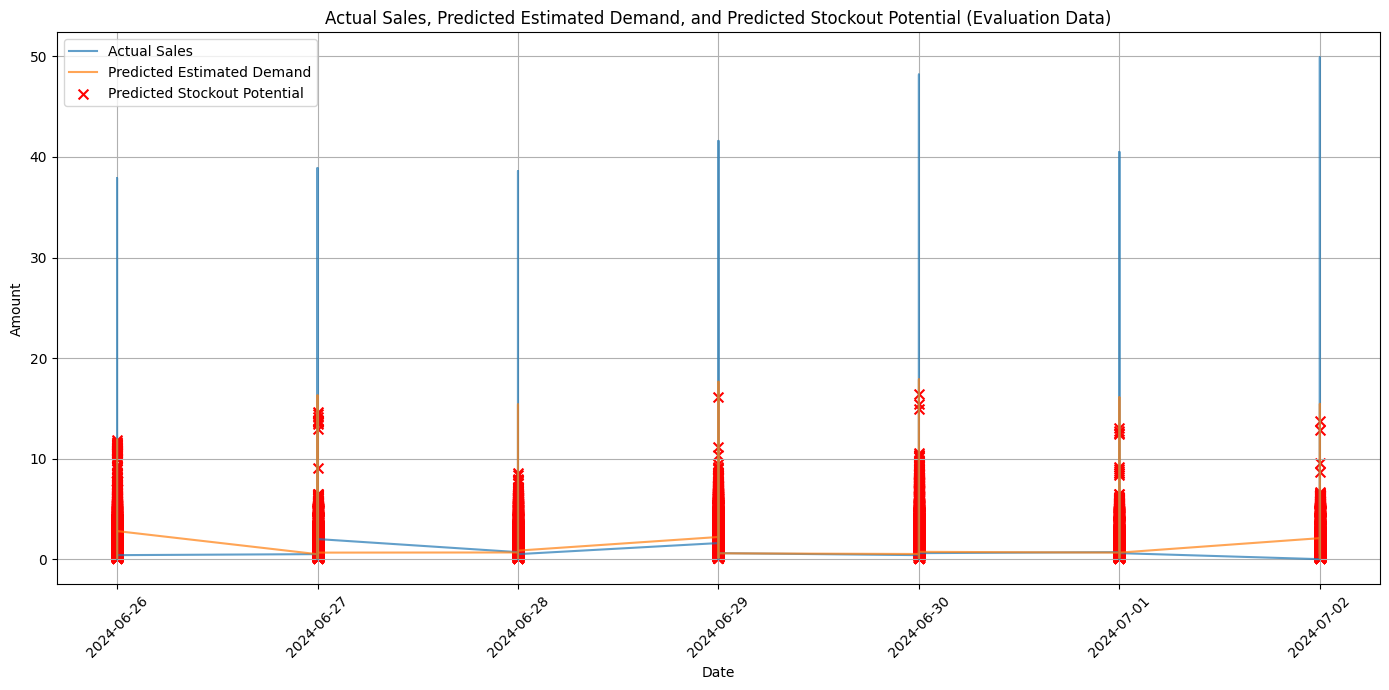

In [ ]:
import matplotlib.pyplot as plt

eval_df_sorted = eval_df.sort_values(by='dt')

plt.figure(figsize=(14, 7))
plt.plot(eval_df_sorted['dt'], eval_df_sorted['sale_amount'], label='Actual Sales', alpha=0.7)
plt.plot(eval_df_sorted['dt'], eval_df_sorted['predicted_estimated_demand'], label='Predicted Estimated Demand', alpha=0.7)

stockout_dates = eval_df_sorted[eval_df_sorted['predicted_stockout_potential']]['dt']
plt.scatter(stockout_dates, eval_df_sorted[eval_df_sorted['predicted_stockout_potential']]['predicted_estimated_demand'], color='red', label='Predicted Stockout Potential', marker='x', s=50)


plt.title('Actual Sales, Predicted Estimated Demand, and Predicted Stockout Potential (Evaluation Data)')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()